This notebook contains codes that used the Augmentor library and Albumentations library to augment image data from the CIFAR 10 dataset. The output of this notebook are tens of thousands of augumented .png images that will be used for training image classfication models.

The two library all have dozens of different image augumentation strategies. The ones that the library that are best at are chosen.

Codes that are used to zip and download output image files are deleted to keep the notebook clean

# **Augmentor**

The Augmentor have good supports for the random erasing image augumentation method. Random Erasing randomly generates rectangle with different size in the image.

In [ ]:
!pip install Augmentor

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image
import os

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
])
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=False)

100%|██████████| 170498071/170498071 [00:03<00:00, 49471015.24it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [ ]:
output_directory = 'cifar10'
os.makedirs(output_directory, exist_ok=True)

In [ ]:
for i, (image, label) in enumerate(testloader, 0):
    image = transforms.ToPILImage()(image[0])
    filename = f"image_{i}.png"
    image_path = os.path.join(output_directory, filename)
    image.save(image_path)

In [ ]:
import Augmentor

In [ ]:
p = Augmentor.Pipeline(output_directory,"output2")

Initialised with 50000 image(s) found.
Output directory set to cifar10/output2.

In [ ]:
p.rotate(probability=0.7, max_left_rotation=25, max_right_rotation=25)
p.zoom_random(probability=0.5, percentage_area=0.8)
p.random_erasing(probability=0.5, rectangle_area=0.4)

In [ ]:
p.sample(50000)

Processing <PIL.Image.Image image mode=RGB size=32x32 at 0x78A009ABB430>: 100%|██████████| 50000/50000 [03:27<00:00, 240.43 Samples/s]


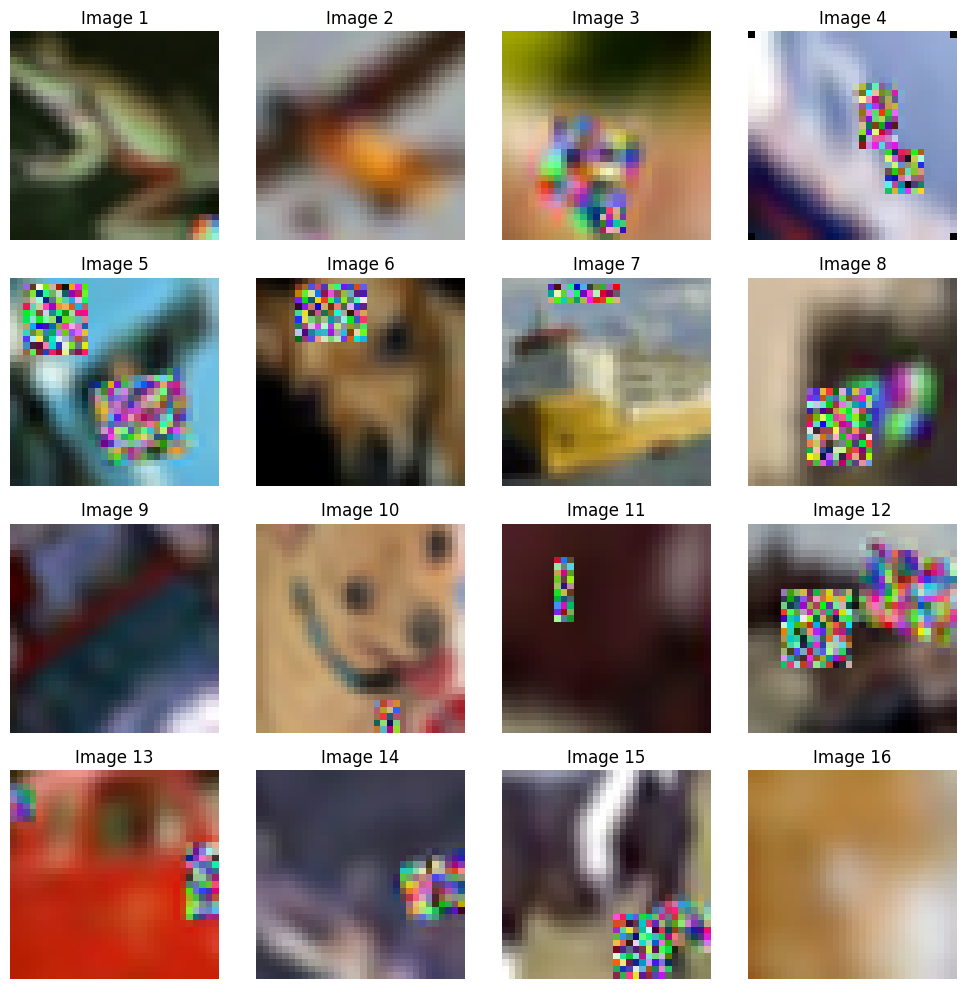

In [ ]:
import random
import matplotlib.pyplot as plt

augmented_images_dir = "cifar10/output2/output"

image_files = [f for f in os.listdir(augmented_images_dir) if os.path.isfile(os.path.join(augmented_images_dir, f))]
selected_image_files = random.sample(image_files, 16)

fig, axes = plt.subplots(4, 4, figsize=(10, 10))
axes = axes.ravel()

for i, image_file in enumerate(selected_image_files):
    image_path = os.path.join(augmented_images_dir, image_file)
    img = Image.open(image_path)

    axes[i].imshow(img)
    axes[i].set_title(f"Image {i+1}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# **Albumentations**

The Albumentations library have good support for the color space transformation data augmentation methods that includes changing brightness, RGB value, and hue value of the images.

In [ ]:
!pip install albumentations

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

Files already downloaded and verified


In [ ]:
import albumentations as A
import cv2

In [ ]:
augmentation_transform = A.Compose([
    A.RandomBrightnessContrast(p=0.2),
    A.HueSaturationValue(p=0.2),
    A.RGBShift(p=0.2),
    A.RandomGamma(p=0.2),
    A.RandomRotate90(p=0.5),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.Transpose(p=0.5),
    A.ElasticTransform(p=0.2),
])

In [ ]:
input_dir = 'cifar10'
image_files = [f for f in os.listdir(input_dir) if f.endswith(".png")]
output_dir = 'albumentations_output'
os.makedirs(output_dir, exist_ok=True)


for i in range(10000):
  random_image_file = random.choice(image_files)
  image_path = os.path.join(input_dir, random_image_file)
  image = cv2.imread(image_path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  transformed_image = augmentation_transform(image=image)["image"]
  filename = f"image_{i}.png"
  output_path = os.path.join(output_dir, filename)
  cv2.imwrite(output_path, transformed_image)


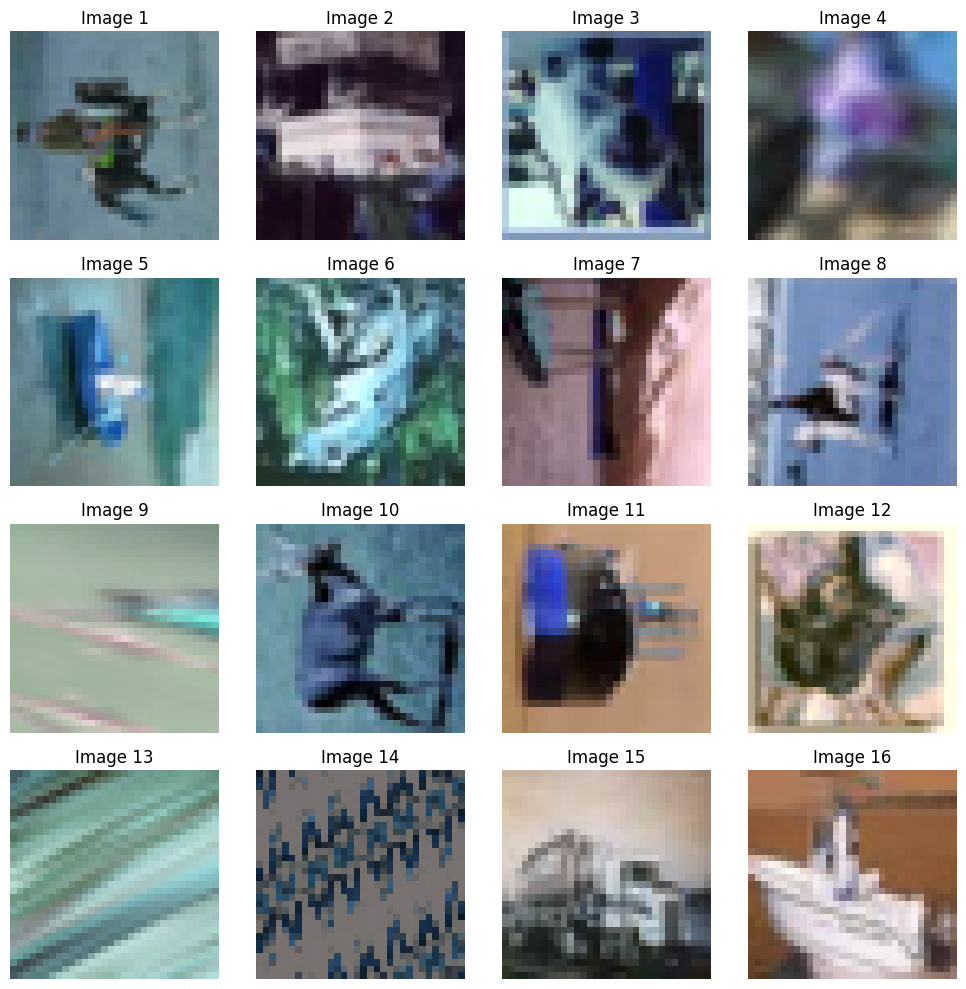

In [ ]:
augmented_images_dir = output_dir

image_files = [f for f in os.listdir(augmented_images_dir) if os.path.isfile(os.path.join(augmented_images_dir, f))]
selected_image_files = random.sample(image_files, 16)

fig, axes = plt.subplots(4, 4, figsize=(10, 10))
axes = axes.ravel()

for i, image_file in enumerate(selected_image_files):
    image_path = os.path.join(augmented_images_dir, image_file)
    img = Image.open(image_path)

    axes[i].imshow(img)
    axes[i].set_title(f"Image {i+1}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()